# Descriptive Statistcs

기술 통계 

In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

# 노트북 셀 표시를 브라우저 전체 폭 사용하기
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import clear_output

%matplotlib inline
import matplotlib.pyplot as plt

import os, sys, shutil, functools
import collections, pathlib, re, string

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=5)
np.set_printoptions(formatter={'float_kind': "{:.5f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import scipy as sp

import seaborn as sns

from pydataset import data

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"scipy ver={sp.__version__}")

python ver=3.8.9 (default, Jun 27 2021, 02:41:12) 
[GCC 7.5.0]
pandas ver=1.2.5
numpy ver=1.19.5
scipy ver=1.6.3


In [2]:
# Iris 데이터 셋의 컬럼 정보 살피기
df_iris = data('iris')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [3]:
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.10000,3.50000,1.40000,0.20000,setosa
2,4.90000,3.00000,1.40000,0.20000,setosa
3,4.70000,3.20000,1.30000,0.20000,setosa
4,4.60000,3.10000,1.50000,0.20000,setosa
5,5.00000,3.60000,1.40000,0.20000,setosa


In [4]:
# describe()을 통한 대략적인 데이터의 통계량 알아보기
df_iris.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.00000,150.00000,150.00000,150.00000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.84333,3.05733,3.75800,1.19933,NaN
std,0.82807,0.43587,1.76530,0.76224,NaN
min,4.30000,2.00000,1.00000,0.10000,NaN
25%,5.10000,2.80000,1.60000,0.30000,NaN
50%,5.80000,3.00000,4.35000,1.30000,NaN
75%,6.40000,3.30000,5.10000,1.80000,NaN


## 대표값

데이터 분석을 위해서 데이터 특성을 이해하기 위해서는 데이터의 특성을 나타내는 몇몇 통계량을 구해봄으로써 데이터를 전체적으로 빠르게 파악해 볼수 있습니다.

일반적으로 많이 쓰이는 대표값은 평균값(Average), 중앙값(Median), 최빈값(Mode) 입니다.

* 평균값: 평균의 데이터의 중심을 나타내는 대표값으로 사용됩니다. 평균의 종류에는 산술평균, 가중평균, 조화평균, 기하평균 등 많은 평균의 종류가 있지만 간단하게 산술평균을 많이 사용합니다.
* 중앙값: 중앙값은 데이터를 작은 순서로 나열했을때 중앙에 위치하는 값입니다. 데이터에 이상치(큰 값)가 포함되어 있더라도 강건(Robust, 값이 크게 흔들리지 않음)합니다. 데이터의 갯수가 짝수일 경우 중앙 값은 중앙 두 데이터의 평균을 사용합니다.  
* 최빈값: 데이터를 계층으로 나누어 빈도수를 측정하였을때 그 빈도수가 가장 많은 값입니다. 

만약, 데이터에 이상치가 포함되어 있지 않고, 데이터의 분포가 치우치지 않았다면, 평균값, 중앙값, 최빈값 모두는 비슷한 위치에 존재하게 됩니다. 이때는 통계적으로 다루기 쉬운 평균값을 대표값으로 사용하는 것이 일반 적입니다.

데이터가 이상치를 포함하고 있다면 평균값은 이상치에 민감하기 때문에 3가지 대표값이 서로 다룬 위치에 존재하게 됩니다. 이 경우 데이터의 도메인 특성에 따라 이상치를 제거하는 등의 방법을 통해 평균을 대표값으로 사용할 수 있습니다.

![](https://i0.wp.com/upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png?w=578&ssl=1)

https://www.r-bloggers.com/2020/11/skewness-and-kurtosis-in-statistics/

@최빈값의 활용: 과거 대칭방식의 암호해독시에 문서상에서 나타나는 알파벳의 최빈값과 암호화된 알파멧의 최빈값을 비교하여 해독의 기준점으로 많이 사용하였다고 합니다.  

In [5]:
# 평균값
df_iris.mean()

Sepal.Length   5.84333
Sepal.Width    3.05733
Petal.Length   3.75800
Petal.Width    1.19933
dtype: float64

In [6]:
# 중앙값
df_iris.median()

Sepal.Length   5.80000
Sepal.Width    3.00000
Petal.Length   4.35000
Petal.Width    1.30000
dtype: float64

In [7]:
# 최빈값
df_iris.mode()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.00000,3.00000,1.40000,0.20000,setosa
1,NaN,NaN,1.50000,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


**여러가지 평균**

산술평균

기하평균

조화평균


## 데이터의 분산

**산포도(Dispersion)**

산포도는 데이터의 흩어짐 정도를 나타냅니다. 같은 데이터의 대표값을 가지더라도 데이터의 산포도는 다를 수 있기 때문에 대표값과 더불어 데이터의 특성을 파악하는데 중요하게 사용됩니다. 

### 사분위수(Quartile)

데이터를 정렬하면 최소값(Min), 최대값(Max), 범위(Range)를 알 수 있으며 대표 값 중에 하나인 중앙값(Median)을 통해 데이터 범위 내에 주요 데이터들의 위치를 알 수 있습니다.

데이터의 분포를 파악하기 위해 데이터를 4등분하여 보는 것은 의미가 있기 때문에 데이터를 4등분하여 나타낸 것을 사분위수(Quartile)라고 합니다. 여기서 각 4등분 위치를 1사분위수(Q1), 2사분위수(Q2=중앙값), 3사분위수(Q3)로 나타내며 1사분위수에서 3사분위수까지를 사분범위(Interquartile Range)라고 합니다. 

숫자로는 직관적으로 분포를 파악하기 힘들기 때문에 상자수염그림(Boxplot)을 사용하여 시각화하여 판단합니다. 

**이상치(Outlier)**

통계적 의미에서 이상치는 데이터의 분포에서 상당히 벗어난 값을 의미 합니다. 이 값은 비정상 적인 값일 수도 있지만, 새로운 관측치일 수도 있습니다. 이 부분에 대한 판단은 자신이 분석하고 있는 데이터의 도메인 특성에 상당히 종속됩니다. 

따라서, 이상치는 데이터를 모델링 하는데 있어 주로 하는 가정이 해당 데이터는 특정 분포를 따른다는 가정이기 때문에, 이상치를 포함한 데이터를 통한 모델링은 이상치에 강건한 모델링 방법이 아니라면 안좋은 영향을 주게 될수도 있지만, 다른 도메인에서 이상치는 가정한 정상 분포를 벗어나는 새로운 데이터이기 때문에 제거해야 할 대상이 아닌 탐지해야 할 대상이 될 수 도 있습니다. 

자신이 풀고자하는 문제 정의에 맞게 데이터에서 이상치를 제거하고 결측치로 생각하여 삭제 할지, 다른 값으로 채워 넣을지, 아니면 탐지하여 알람을 보낼지 선택하면 됩니다.

이상치를 탐지하는 방법은 크게 이상치가 단변량(Univariate)이냐, 다변량(Multivariate)이냐에 따라 방법이 달라지게 됩니다.

* 단변량 이상탐지는 값들이 1차원 상에 분포하기 때문에 주로 분포를 가정한 통계적 방법이 사용됩니다.
  * Z-score
  * Tukey Outlier
* 다변량 이상탐지는 2차원 이상에 분포하기 때문에 주로 벡터 거리 기반 또는 트리 방법을 통한 클러스터링 방법이 주로 사용됩니다.
  * DBScan Clustering
  * Isolation Forest
  * Robust Random Cut Forest

**Tukey Outlier**

Boxplot에서는 이상치(Outlier)에 민감하지 않은 분위수를 사용하기 때문에 이를 이용하여 통계적으로 이상치를 잘 검출할 수 있습니다. Boxplot 에서 이상치는 통계적 최소값인 Q1 - 1.5 x IQR 보다 작거나 최대값인 Q3 + 1.5 x IQR 보다 큰 값들을 가르킵니다. 

* IQR(interquartile range) = 3rd Quartile - 1st Quartile
* Upper Bound = 3rd Quartile + (IQR * 1.5)
* Lower Bound = 1st Quartile - (IQR * 1.5)

![boxplot](https://cdn-images-1.medium.com/max/800/1*2c21SkzJMf3frPXPAR_gZA.png)

질적변수에 속하는 명목척도, 서열척도의 경우 평균을 구할 수 없기 때문에 사분위수를 통한 데이터 탐색은 더욱 의미가 큽니다.

In [8]:
# 사분위수 
q1 = df_iris['Sepal.Width'].quantile(.25)
q2 = df_iris['Sepal.Width'].quantile(.5)
q3 = df_iris['Sepal.Width'].quantile(.75)
iqr = q3 - q1
print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}, IQR: {iqr:.2f}")

Q1: 2.8, Q2: 3.0, Q3: 3.3, IQR: 0.50


Text(0.5, 1.0, '')

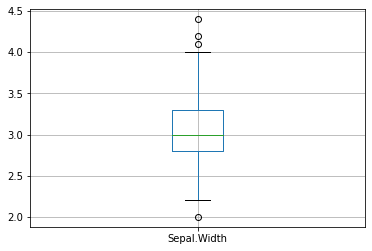

In [9]:
# Boxplot를 이용한 시각화 
df_iris.boxplot(column='Sepal.Width')
plt.title('')

<AxesSubplot:ylabel='Sepal.Width'>

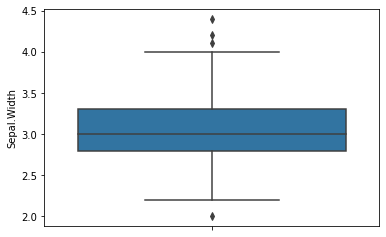

In [10]:
# Seaborn를 이용한 Boxplot 시각화
sns.boxplot(y='Sepal.Width', data=df_iris)

Text(0.5, 1.0, '')

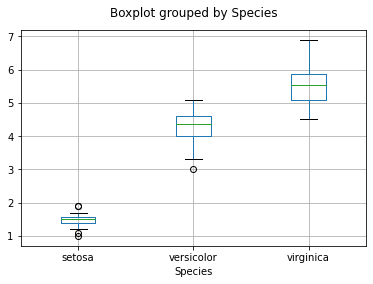

In [11]:
# Boxplot를 이용한 시각화 
df_iris.boxplot(column='Petal.Length', by='Species')
plt.title('')

<AxesSubplot:xlabel='Species', ylabel='Petal.Length'>

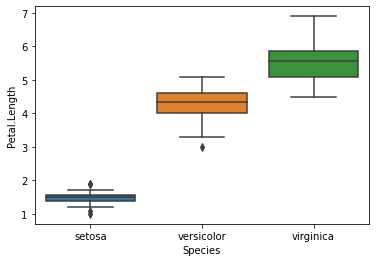

In [12]:
# Seaborn를 이용한 Boxplot 시각화
sns.boxplot(x='Species', y='Petal.Length', data=df_iris)

### 분산(Variance), 표준편차(Standard Deviation)

분산과 표준편차는 평균값을 이용해 산포도를 수치화 할 수 있으며, 통계 계산시에도 평균값과 함께 사용하기 유용합니다.

* 편차(Deviation): 데이터가 평균으로부터 떨어진 정도, 데이터 - 평균
* 분산(Variance): 편차 제곱의 평균, 편차의 평균은 항상 0 이 되기 때문에 분산을 이용함
* 표준편차(Standard Deviation): 분산의 제곱근, 분산은 제곱값으로 수가 너무 크고, 단위가 변하기(예, $m$ -> $m^2$)때문에 표준편차를 이용함

![](https://mechanicalbase.com/wp-content/uploads/2020/11/image.png)


In [13]:
# 분산
df_iris.var()

Sepal.Length   0.68569
Sepal.Width    0.18998
Petal.Length   3.11628
Petal.Width    0.58101
dtype: float64

In [14]:
# 표준편차
df_iris.std()

Sepal.Length   0.82807
Sepal.Width    0.43587
Petal.Length   1.76530
Petal.Width    0.76224
dtype: float64

### 변동계수(Coefficient of Variation)

변동계수(CV)는 표준편차를 평균으로 나눈 값으로 두 집단에서 데이터의 흩어짐 정도를 비교하는데 사용합니다.  

![](https://toptipbio.com/wp-content/uploads/2017/04/Coefficient-of-variation-CV-formula.jpg)

예를 들어 두 회사의 연도별 수익률에 대하여 어느 회사가 변동폭이 큰지를 비교할때 사용해볼 수 있습니다.

![](https://exceltable.com/en/analyses-reports/images/analyses-reports11-1.png)
![](https://exceltable.com/en/analyses-reports/images/analyses-reports11-2.png)

https://exceltable.com/en/analyses-reports/coefficient-variation-in-excel

In [15]:
# Scipy 를 통한 CV 계산
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.variation.html
mean1 = df_iris['Sepal.Length'].mean()
mean2 = df_iris['Petal.Length'].mean()
cv1 = sp.stats.variation(df_iris['Sepal.Length'])
cv2 = sp.stats.variation(df_iris['Petal.Length'])
print(f"mean1: {mean1:.2f}, mean2: {mean2:.2f}")
print(f"cv1: {cv1:.2f}, cv2: {cv2:.2f}")

mean1: 5.84, mean2: 3.76
cv1: 0.14, cv2: 0.47


## 데이터의 상관

**상관계수**

상관계수는 두 변수 사이의 통계적 관계를 수치적으로 나타낸 계수입니다. 두 변수 사이의 통계가 관계를 나타내는 지표로 -1 ~ 1 사이의 값을 가집니다.

예로 기온와 아이스크림 판매량, 수입과 외식 횟수와 같이 어느 한 변수가 다른 변수와 증감 관계가 있는지 판단하여 결과를 이용하고자 할때 사용합니다. 하지만 해석에 주의해야 할점은 상관관계가 높은 것은 두 변수의 증감이 서로 밀접한 상관이 있다는 수치 일 뿐 두 변수가 원인과 결과 관계를 가진다는 의미는 아니라는 점입니다.   

![](https://getcalc.com/formula/statistics/correlation-coefficient.png)

https://getcalc.com/statistics-correlation-coefficient-calculator.htm

* 1: 양의상관, 한 변수가 증가하면 다른 변수도 증가
* -1: 음의상관, 한 변수가 증가하면 다른 변수는 감소, 한 변수가 감소하면 다른 변수는 증가
* 0: 무상관, 두 변수의 증가 감소가 서로 상관 없음

**산점도**

상관관계를 산점도로 표시하면 좀 더 시각적으로 두 변수의 상관 관계를 파악해 볼 수 있습니다.

![](https://cdn1.byjus.com/wp-content/uploads/2021/03/Correlation.png)

https://byjus.com/maths/correlation/


**Further Reading**
* [NumPy, SciPy, and Pandas: Correlation With Python](https://realpython.com/numpy-scipy-pandas-correlation-python/)

In [24]:
# pandas 의 corr() 를 이용하여 상관 계수 구하기
df_corr = df_iris.corr(method='pearson')
df_corr

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.00000,-0.11757,0.87175,0.81794
Sepal.Width,-0.11757,1.00000,-0.42844,-0.36613
Petal.Length,0.87175,-0.42844,1.00000,0.96287
Petal.Width,0.81794,-0.36613,0.96287,1.00000


stats.pearsonr() 함수를 이용하면 상관 계수 r 및 p-value 값을 구할 수 있습니다.

상관계수의 수치만 보고 애매할때가 있는데 p-value가 0.05보다 작을 경우

* H0 명제 '두 변수간의 상관 관계가 없다'를 기각 
* H1 명제 '두 변수간의 상관 관계가 있다'를 채택

할 수 있으므로 두 변수의 상관에 대한 판단을 좀더 수치적으로 할 수 있게 됩니다.

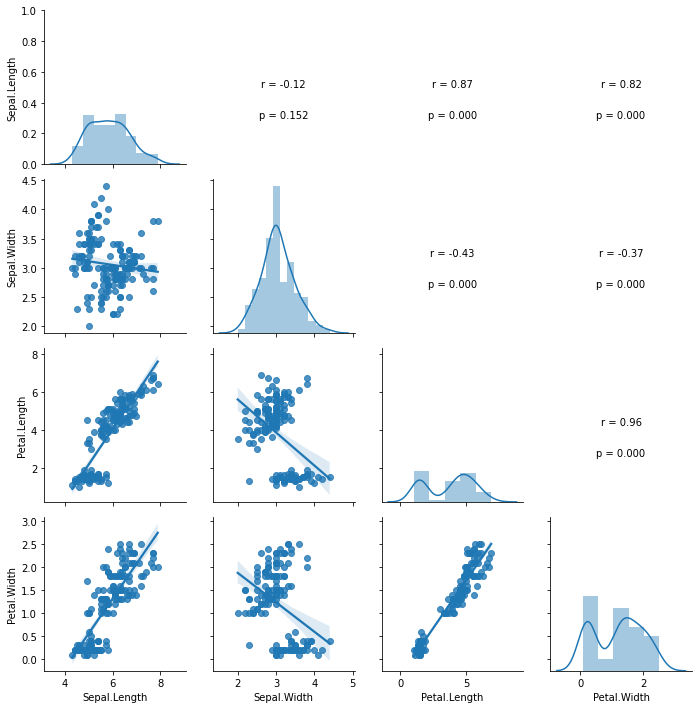

In [25]:
# https://stackoverflow.com/questions/63416894/correlation-values-in-pairplot
# stats.pearsonr() 함수를 이용하면 상관 계수 r 및 p-value 값을 구할 수 있습니다.
# 상관계수의 수치만 보고 애매할때가 있는데 p-value가 0.05보다 작을 경우 
# '두 변수간의 상관 관계가 없다'는 H0 명제를 기각하고 '두 변수간의 상관 관계가 있다'는 H1 명제를 채택할 수 있으므로
# 두 변수의 상관에 대한 판단을 좀더 수치적으로 할 수 있게 됩니다.
def pearsonr(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = sp.stats.pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.3f}'.format(p), xy=(0.5,0.3), xycoords='axes fraction', ha='center')    
    ax.set_axis_off()

g = sns.PairGrid(df_iris)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(pearsonr)

**히트맵**

데이터가 많은 경우 산점도를 그래프로 표시하는 것이 힘들 경우가 있습니다. 이때는 상관 계수값을 히트맵을 통해 시각화하여 좀더 빠르게 살펴볼 수 있습니다.

In [26]:
# pandas에서 구한 corr 테이블에 색을 입혀 간단하게 히트맵을 그려봅니다.
df_corr.style.background_gradient(cmap='YlOrRd')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

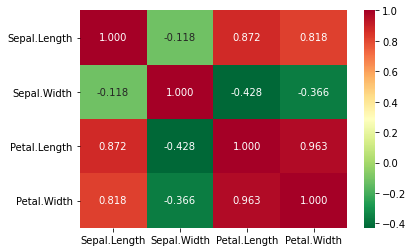

In [27]:
# seaborn의 heatmap() 를 이용해서도 나타날수 있습니다.
sns.heatmap(df_corr, annot=True, fmt='.3f', cmap='RdYlGn_r')

**순위 상관**

데이터가 서열 척도 같은 순위 데이터일 경우 두 변수 간의 상관 관계를 나타낼때는 순위 상관계수를 이용합니다.

스피어만의 순위 상관계수

순위 데이터를 가지고 피어슨의 확률 상관계수를 계산하면 스피어만의 순위 상관 계수임

![](https://slidetodoc.com/presentation_image_h/f9e4f49393e0bc2b8b63898bc5ab238c/image-2.jpg)

https://slidetodoc.com/spearmans-rank-correlation-spearmans-rank-correlation-coefficient-measures/

켄달의 순위 상관계수

두 변수 X, Y에 대하여 소비자 1,2,3 이 각각 선호도 순위를 평가한 값에서 소비자 1,2,3중 두 소비자의 조합: (1, 2), (1, 3), (2, 3) 중 X, Y에 대한 순위의 크기가 일치하거나 일치하지 않는 쌍의 수를 이용하여 지표 계산

소비자 1의 순위 데이터 (X1, Y1), 소비자 2의 순위 데이터 (X2, Y2) 라고 한다면,

* 일치: X1 < X2 이고 Y1 < Y2, 또는 X1 > X2 이고 Y1 > Y2 일때
* 불일치: X1 < X2 이고 Y1 > Y2 또는 X1 > X2 이고 Y1 < Y2 일때

$$tau = \frac{(n_{concordant} - n_{disconcordant})}{\frac{n(n-1)}{2}}$$
 
https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

In [32]:
df_race = pd.DataFrame(
    [
        [4,5],
        [10,8],
        [3,6],
        [1,2],
        [9,10],
        [2,3],
        [6,9],
        [7,4],
        [8,7],
        [5,1]        
    ],
    columns=["X rank","Y rank"])
df_race.head()

,X rank,Y rank
0,4,5
1,10,8
2,3,6
3,1,2
4,9,10


In [29]:
# pandas 의 corr() 를 이용하여 순위 상관 계수 구하기
# method = 'spearman', 'kendall'
df_corr = df_race.corr(method='spearman')
df_corr.style.background_gradient(cmap='YlOrRd')

,male rank,female rank
male rank,1.000000,0.684848
female rank,0.684848,1.000000


<AxesSubplot:>

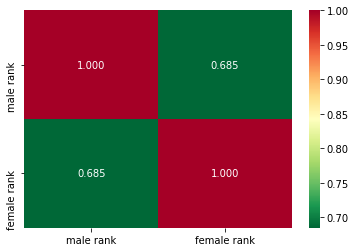

In [30]:
# seaborn의 heatmap() 를 이용해서도 나타날수 있습니다.
sns.heatmap(df_corr, annot=True, fmt='.3f', cmap='RdYlGn_r')

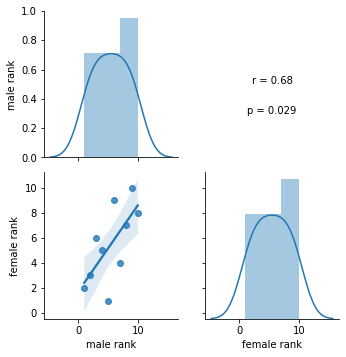

In [31]:
# stats.spearmanr() 함수를 이용 순위 상관 계수 r 및 p-value 값
def spearmanr(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = sp.stats.spearmanr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.3f}'.format(p), xy=(0.5,0.3), xycoords='axes fraction', ha='center')    
    ax.set_axis_off()

# stats.kendalltau() 함수를 이용 순위 상관 계수 r 및 p-value 값
def kendalltau(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r = sp.stats.kendalltau(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.3f}'.format(p), xy=(0.5,0.3), xycoords='axes fraction', ha='center')    
    ax.set_axis_off()

g = sns.PairGrid(df_race)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(spearmanr)
#g.map_upper(kendalltau)